# **Final Project - Customer Churn Classification and Clustering**

**Ediashta Revindra Amirussalam** <br>
FTDS - 020 - RMT

## Objective

An attrited customer, also known as a churned customer, is a business term that refers to a customer who has discontinued doing business with a company or organization. This could indicate that they have canceled their subscription, stopped purchasing products or services, or otherwise terminated their relationship with the company.

Customer attrition, or churn, is an important metric for businesses to track because it has a direct impact on revenue and growth. Customer attrition rates that are high may indicate issues with customer satisfaction, service quality, or competition. Retaining existing customers is often less expensive than acquiring new ones, so businesses typically invest time and effort in determining why customers leave and implementing strategies to reduce attrition and retain valuable customers.


As a data analyst in Danamon Bank, we will build a model to predict customer churn classification and then cluster churned customers using the following model:

**Classification**
* SVC
* Decision Tree
* Random Forest
* XGBoost

We will use recall as the primary evaluation metric. In the context of churn prediction, false negatives could result in missing actual churn cases, which is undesirable. By optimizing recall, the model aims to capture a higher proportion of actual churn cases, reducing the risk of misclassifying customers who are actually about to churn.

**Clustering**
* K-Means

We can see the behavior of our churning customers and advise a strategy to maintain them as customers based on their cluster.

## Datasets

The dataset used is obtain from this link bellow <br>
[Customer Segmentation Credit Card](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)

This dataset contain 23 Columns and 10K Rows, with column details as follows:
| Column name | Description | Data Types |
|---|---|---|
**CLIENTNUM** | Unique identifier for each customer. | Integer |
**Attrition_Flag** | Flag indicating whether or not the customer has churned out. | Boolean |
**Customer_Age** | Age of customer. | Integer |
**Gender** | Gender of customer. | String |
**Dependent_count**	| Number of dependents that customer has. | Integer |
**Education_Level**	| Education level of customer. | String |
**Marital_Status** | Marital status of customer. | String |
**Income_Category**	| Income category of customer. | String |
**Card_Category** | Type of card held by customer. | String |
**Months_on_book** | How long customer has been on the books. | Integer |
**Total_Relationship_Count** | Total number of relationships customer has with the credit card provider. | Integer |
**Months_Inactive_12_mon** | Number of months customer has been inactive in the last twelve months. | Integer |
**Contacts_Count_12_mon** | Number of contacts customer has had in the last twelve months. | Integer |
**Credit_Limit** | Credit limit of customer. | Integer |
**Total_Revolving_Bal** | Total revolving balance of customer. | Integer |
**Avg_Open_To_Buy** | Average open to buy ratio of customer. | Integer |
**Total_Amt_Chng_Q4_Q1** | Total amount changed from quarter 4 to quarter 1. | Integer |
**Total_Trans_Amt** | Total transaction amount. | Integer |
**Total_Trans_Ct** | Total transaction count. | Integer |
**Total_Ct_Chng_Q4_Q1** | Total count changed from quarter 4 to quarter 1. | Integer |
**Avg_Utilization_Ratio** | Average utilization ratio of customer. | Integer |
**Naive_Bayes_Classifier_Attrition**... |	Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

## 00. Import Libraries

In this project we are using several libraries such as seaborn, sklearn and xgboost

In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
from scipy.stats import chi2_contingency

from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

import pickle
import warnings
warnings.filterwarnings('ignore')

## 01. Data Loading

We can proceed to load the dataset and make a separated copy

In [2]:
#read csv file
bank_df = pd.read_csv('./datasets/BankChurners.csv')
df_copy = bank_df.copy()

print(f'Dataset Columns: {bank_df.shape[1]}')
print(f'Dataset Rows: {bank_df.shape[0]}')

Dataset Columns: 23
Dataset Rows: 10127


In [3]:
#check head
bank_df.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
#check info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

As we can see, column no 21 and 22 are actually a prediction from the model before, we can remove this column to avoid data leaking and use Attrition_Flag as our label instead

In [5]:
#drop unused columns
bank_df.drop(columns=["CLIENTNUM", 
                      "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                      "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

In [6]:
#check null value
bank_df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
#check duplicate data
bank_df.duplicated().sum()

0

There are no missing values and duplicated data so we don't need to handle those

---

## 02. EDA

In [8]:
#check basic statistics
bank_df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

We can proceed to check the basic statistic from the dataset, gaining following insight:
1. **Age:**
   * Average customer age is apporximately 46 years old
   * With the same median value, this mean that the age is normally distributed
2. **Credit Limit:**
   * Average customer has a credit limit aroun 8600
   * More people have credit limit lower that 8600 based on the median value which is only around 4500
   * This column has a very wide range with max value being around 34000
3. **Avg Utilization Ratio:**
   * The mean value is about 0.27, indicating that, on average, customers only utilize about 27% of their available credit.


We can then divide column based on in datatypes to further analyze the data

In [9]:
#separate numeric and category column
num_col = bank_df.select_dtypes(include=np.number).columns.tolist()
cat_col = bank_df.select_dtypes(include=object).columns.tolist()

print(f'Numeric Column : {num_col}')
print(f'Category Column : {cat_col}')

Numeric Column : ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Category Column : ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


To analyze the data distribution, we need a different type of plot for each datatype; to accomplish this, we can define a separate function for each plot, which will be called later in the for loop.

In [10]:
#set plot style
sns.set(style="whitegrid")
palette=["teal", "darkblue"]

#define hist plot function
def hist_plot(column, loc, row, axs):
    ax = sns.histplot(data=bank_df, x=column, ax=axs[loc,row], kde=True, bins=50, palette=palette, hue="Attrition_Flag")
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)

#define count plot function
def count_plot(column, loc, row, axs):
    if column != "Attrition_Flag":
        ax = sns.countplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, hue="Attrition_Flag", alpha=0.7)
    else:
        ax = sns.countplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, alpha=0.7)
        
    ax.tick_params(axis="x", rotation=15)
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)
    
#define boxplot
def box_plot(column, loc, row, axs):
    ax = sns.boxplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, hue="Attrition_Flag", fliersize=3, boxprops=dict(alpha=.7))
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)

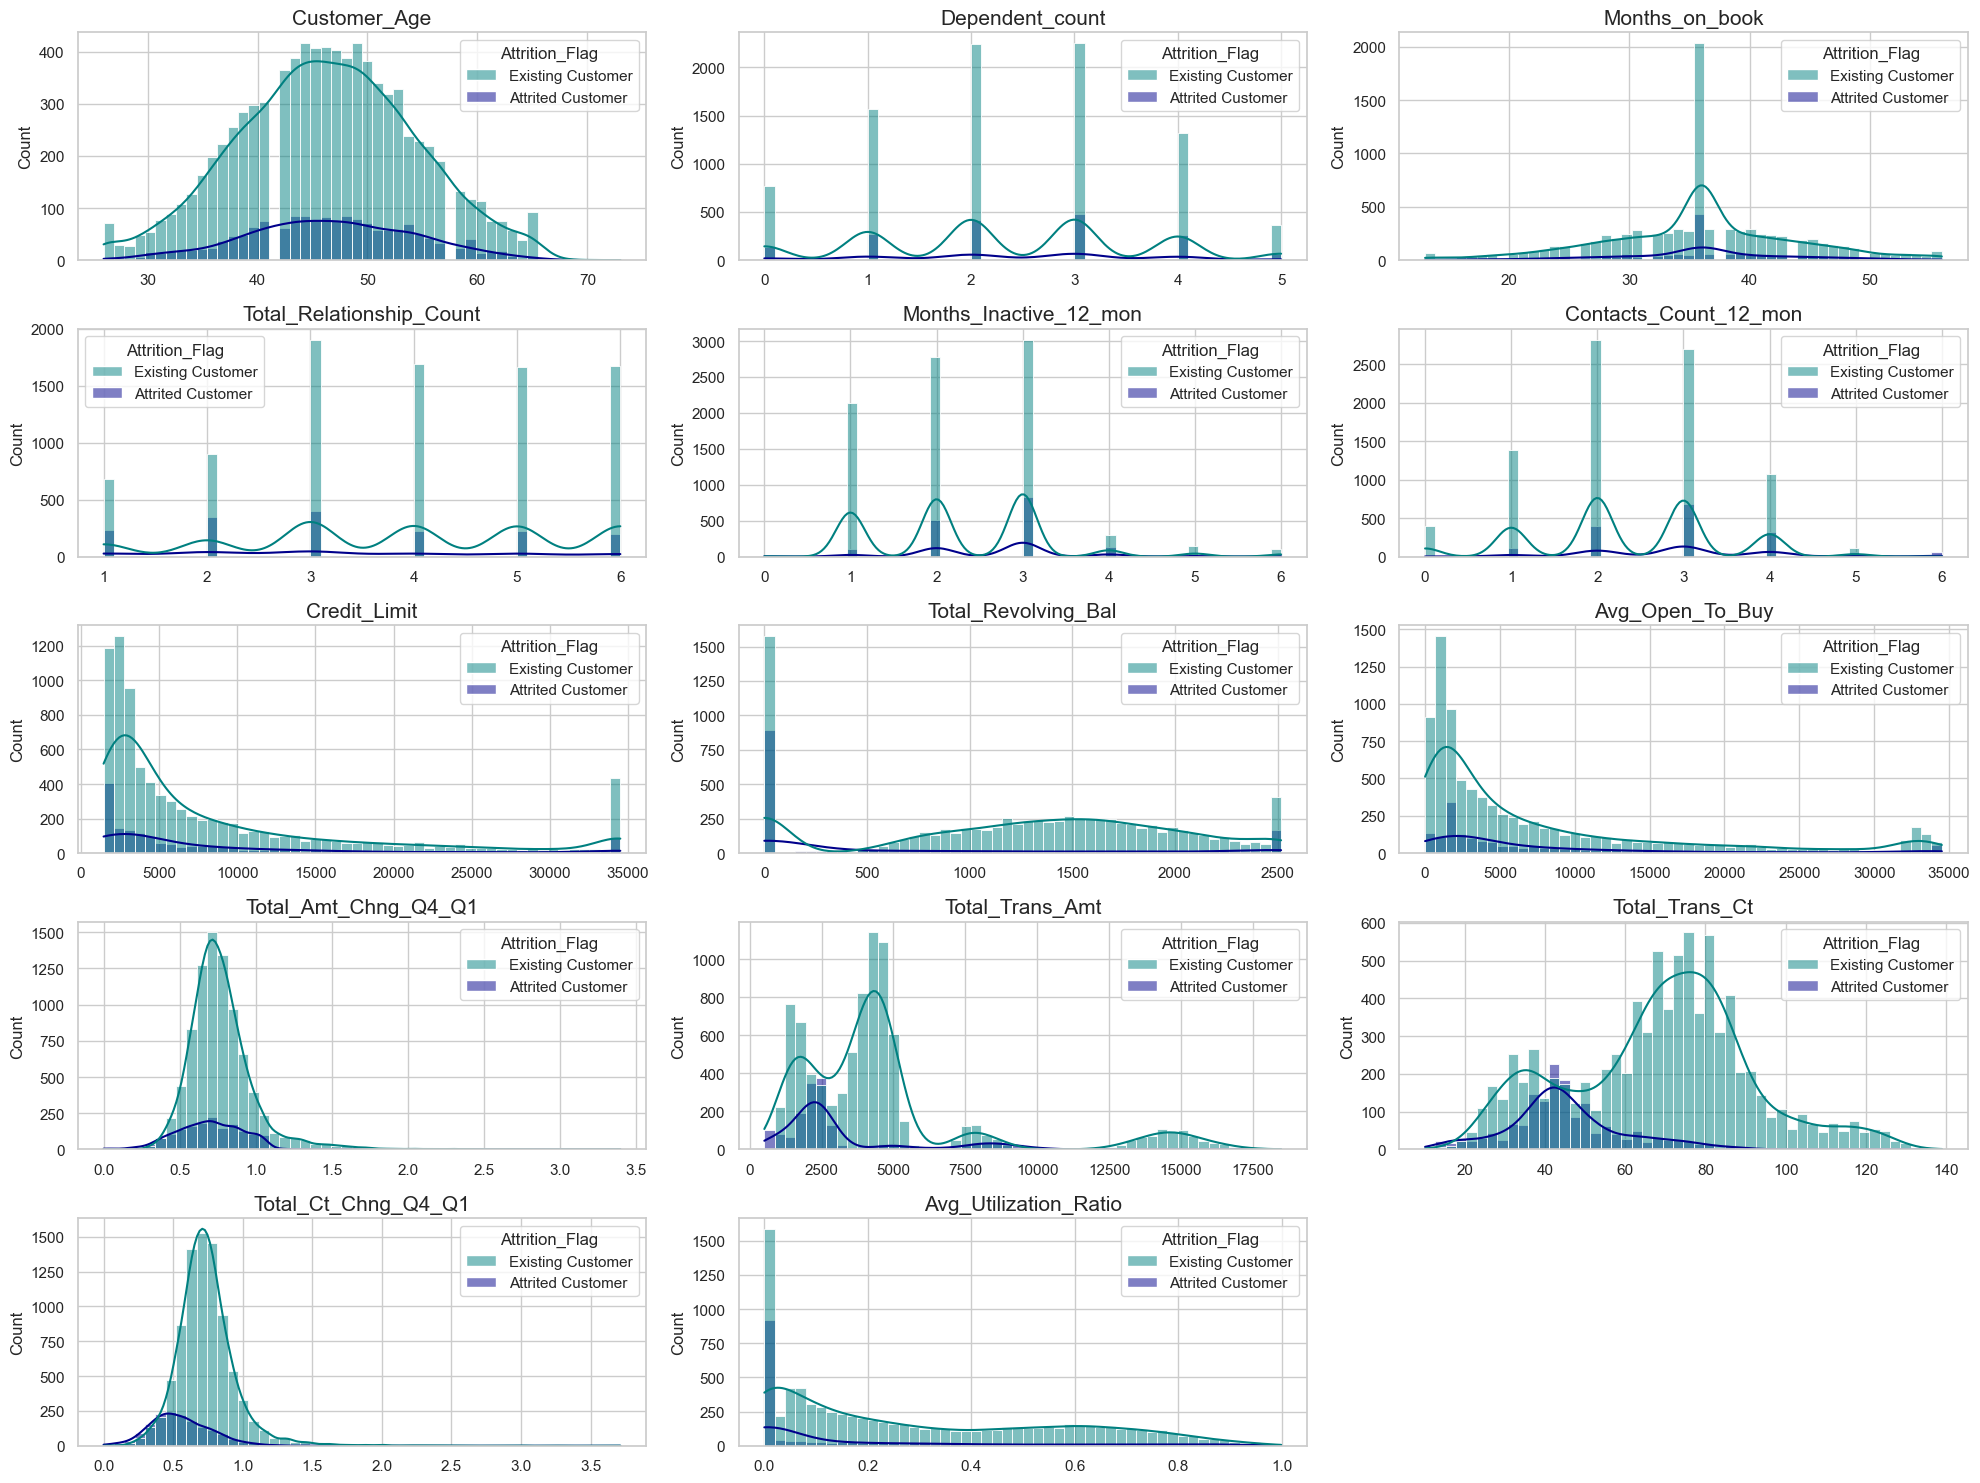

In [11]:
#loop num_col
fig, axs = plt.subplots(5,3, figsize=(20,15))
for i,x in enumerate(num_col):
    if i < 3:
        hist_plot(x, 0, i, axs)
    elif i < 6:
        hist_plot(x, 1, i-3, axs)
    elif i < 9:
        hist_plot(x, 2, i-6, axs)
    elif i < 12:
        hist_plot(x, 3, i-9, axs)
    elif i < 15:
        hist_plot(x, 4, i-12, axs)
        
axs[4,2].set_axis_off()
fig.tight_layout()

In [12]:
for i,x in enumerate(num_col):
    skewness = round(bank_df[x].skew(),2)
    print(x, 'skewness :', skewness)

Customer_Age skewness : -0.03
Dependent_count skewness : -0.02
Months_on_book skewness : -0.11
Total_Relationship_Count skewness : -0.16
Months_Inactive_12_mon skewness : 0.63
Contacts_Count_12_mon skewness : 0.01
Credit_Limit skewness : 1.67
Total_Revolving_Bal skewness : -0.15
Avg_Open_To_Buy skewness : 1.66
Total_Amt_Chng_Q4_Q1 skewness : 1.73
Total_Trans_Amt skewness : 2.04
Total_Trans_Ct skewness : 0.15
Total_Ct_Chng_Q4_Q1 skewness : 2.06
Avg_Utilization_Ratio skewness : 0.72


We can draw the following conclusion from those plots and their skewness values:
* Aprroximately Symetric
  * Customer_Age
  * Dependent_Count
  * Months_on_book
  * Total_Relationship
  * Contacts_Count_12_mon
  * Total_Revolving_Bal
  * Total_Trans_Ct
* Moderately Skewed
  * Months_Incaative_12_mon
  * Avg_Utilization_Ratio
* Highly Skewed
  * Credit_Limit
  * Avg_Open_To_Buy
  * Total_Trans_Amt
  * Total_Ct_Chng_Q4_Q1

We can see from this distribution that the data that is normally distributed is mostly basic customer information, whereas the data that is highly skewed is user behavior when using credit cards, implying that there is a large disparity in user behavior when using credit cards.

However, we can't learn the difference in behavior between attrited and existing customers by using those plots, so we'll compare each feature mean between attrited and existing customers.

In [13]:
bank_df.groupby('Attrition_Flag')[num_col].mean().applymap("{0:.2f}".format)

Customer_Age Dependent_count Months_on_book  \
Attrition_Flag                                                  
Attrited Customer        46.66            2.40          36.18   
Existing Customer        46.26            2.34          35.88   

                  Total_Relationship_Count Months_Inactive_12_mon  \
Attrition_Flag                                                      
Attrited Customer                     3.28                   2.69   
Existing Customer                     3.91                   2.27   

                  Contacts_Count_12_mon Credit_Limit Total_Revolving_Bal  \
Attrition_Flag                                                             
Attrited Customer                  2.97      8136.04              672.82   
Existing Customer                  2.36      8726.88             1256.60   

                  Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt  \
Attrition_Flag                                                           
Attrited Customer         7463.22                 0.69         3095.03   
Existing Customer         7470.27                 0.77         4654.66   

                  Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio  
Attrition_Flag                                                              
Attrited Customer          44.93                0.55                  0.16  
Existing Customer          68.67                0.74                  0.30

There aren't many noticeable differences between those two groups, but there are a few columns worth noting:
* Existing Customers have a $600 higher credit limit than Attrited Customers.
* According to the revolving balance, total transaction amount, and utilization ratio, existing customers use credit cards more than attrited customers.

These characteristics will serve as a differentiator between two classes.

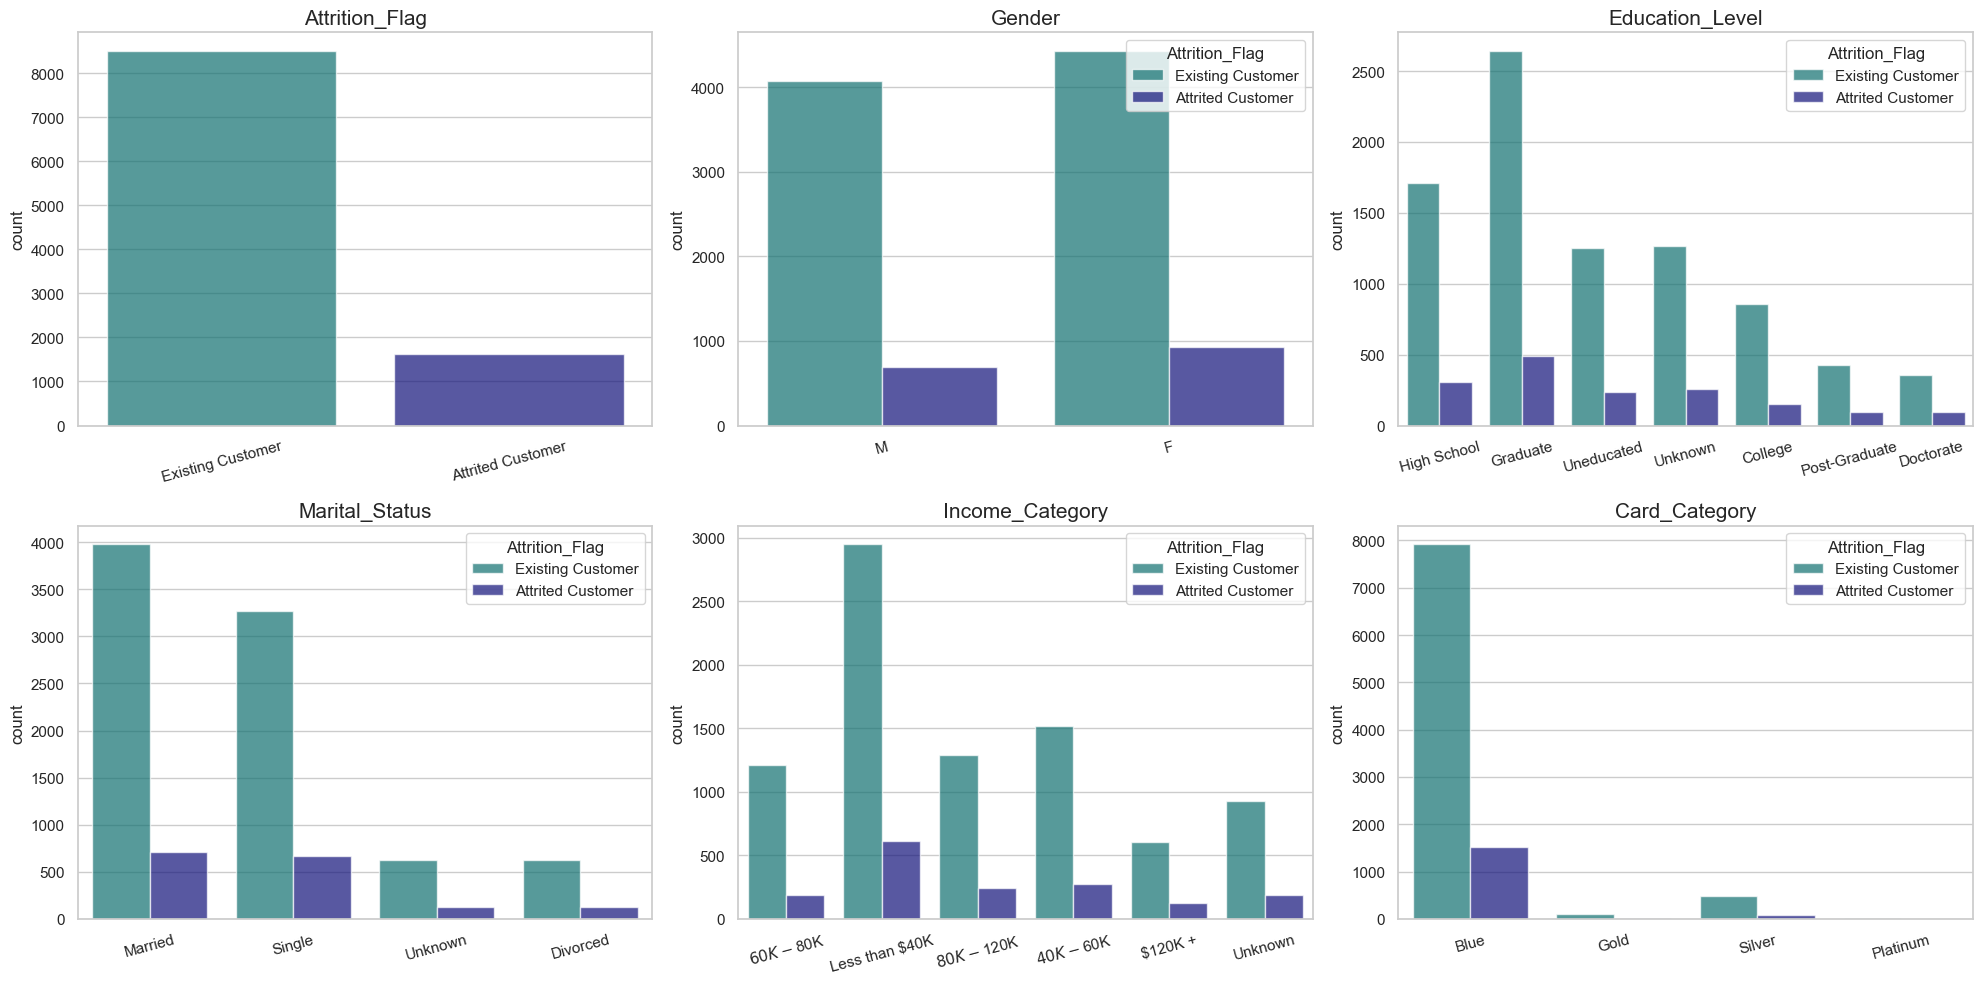

In [14]:
#loop categorical column
fig, axs = plt.subplots(2,3, figsize=(20,10))
for i,x in enumerate(cat_col):
    if i < 3:
        count_plot(x, 0, i, axs)
    elif i < 6:
        count_plot(x, 1, i-3, axs)

fig.tight_layout()


We can learn several things from this count plot:
* Because there are far fewer customers with attrited status, we may need to resample later. 
* The majority of customers have a graduate level of education, followed by high school. 
* The majority of customers are married, have less than $40k yearly income, and use the blue card type.

We can then use a boxplot to see which columns have significant outliers with which we must deal.

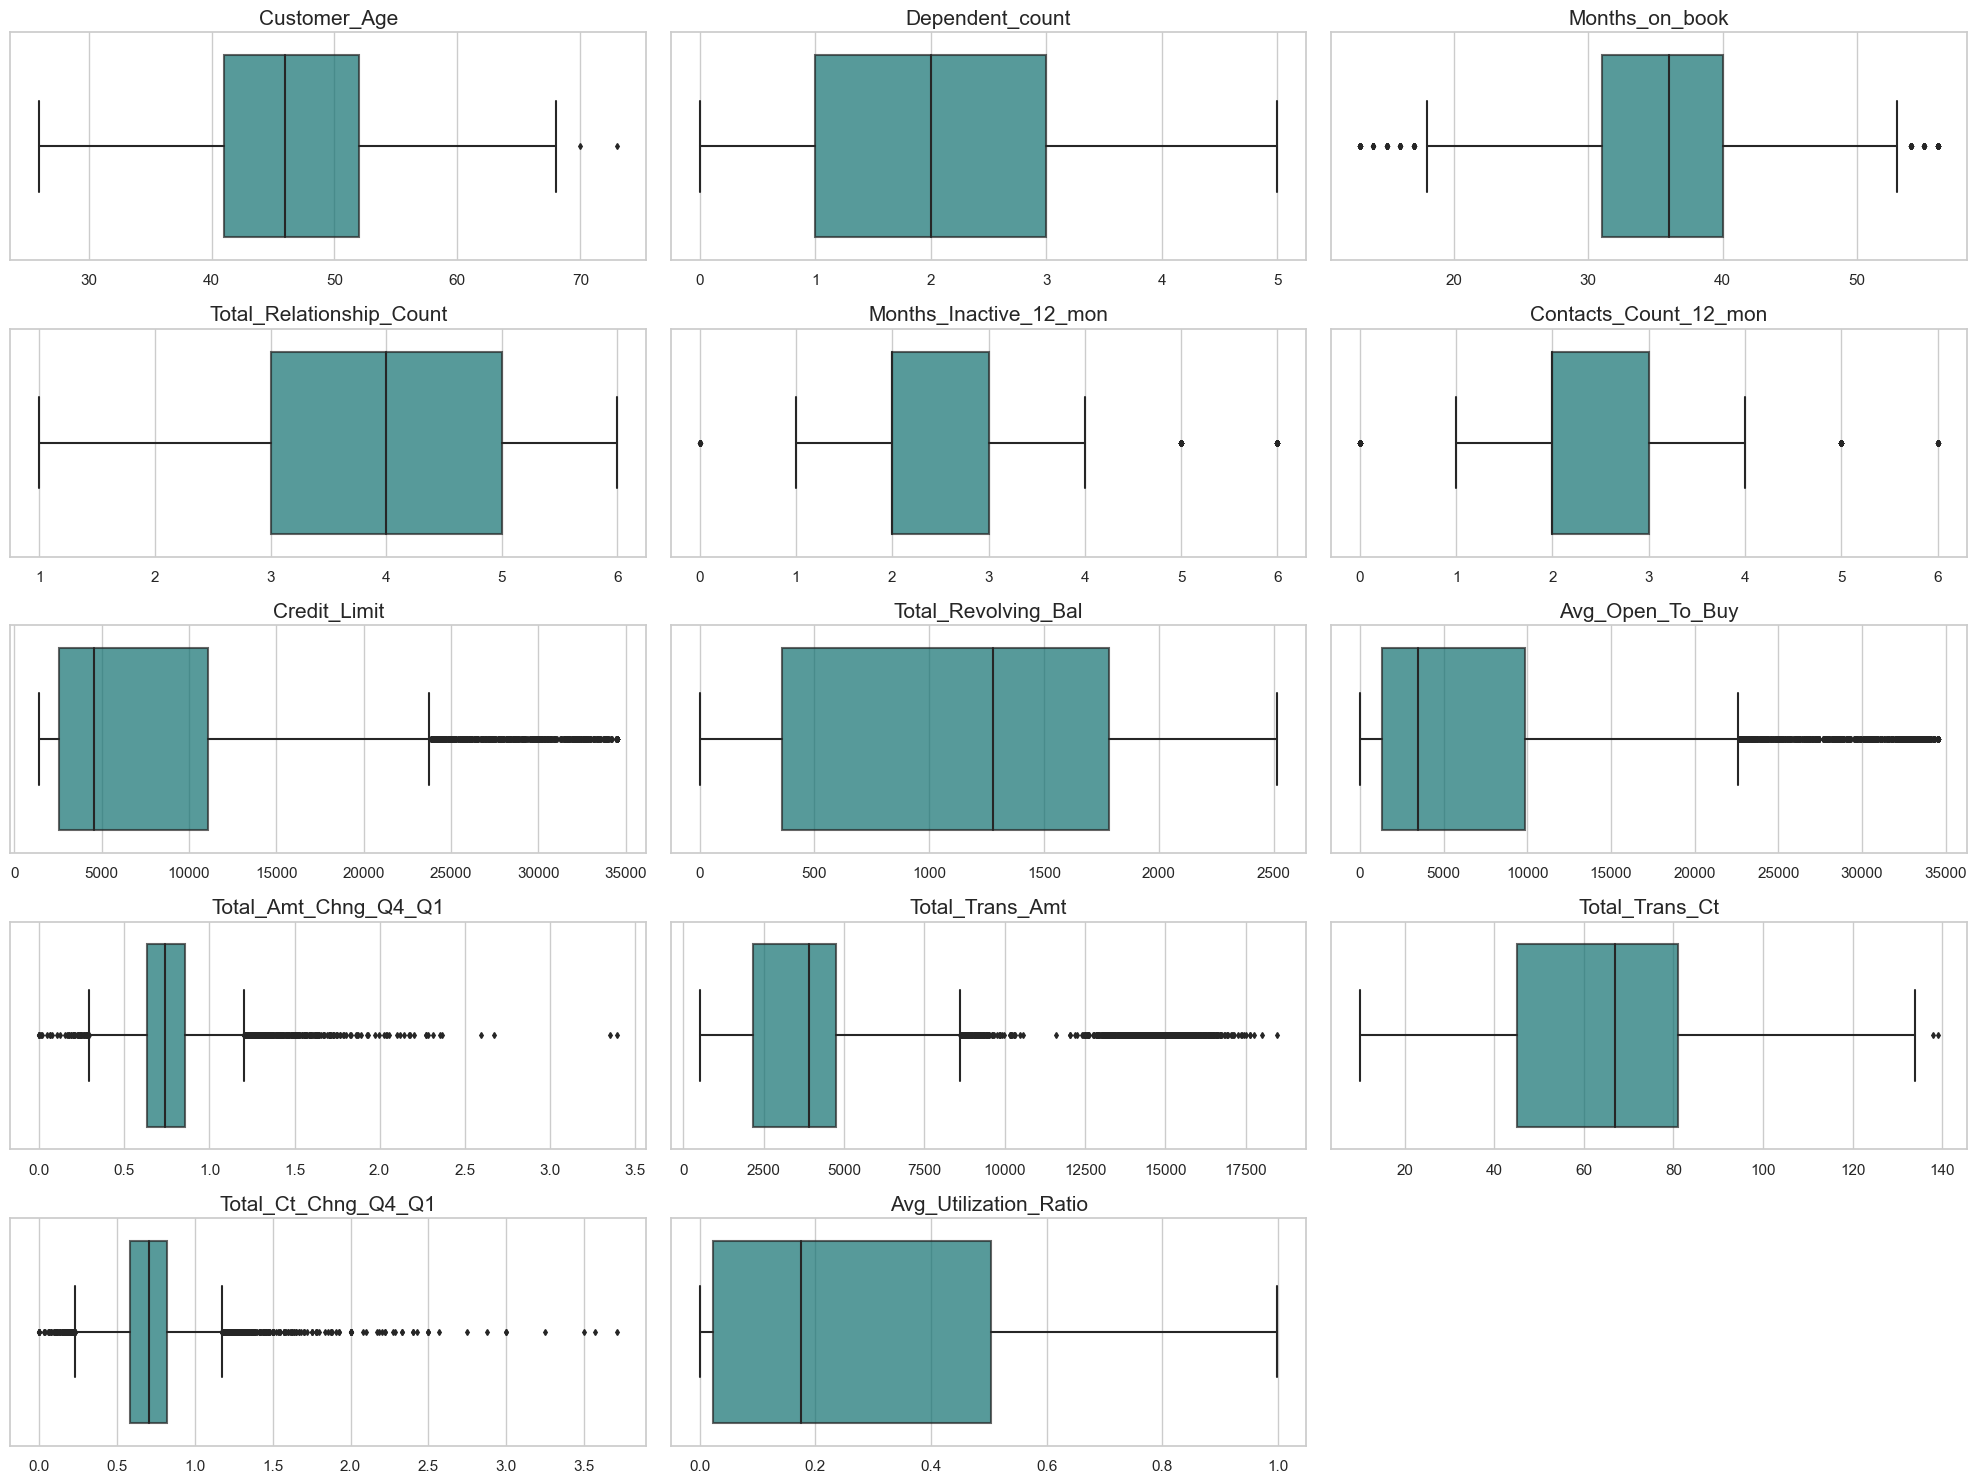

In [15]:
#loop boxplot
fig, axs = plt.subplots(5,3, figsize=(20,15))
for i,x in enumerate(num_col):
    if i < 3:
        box_plot(x, 0, i, axs)
    elif i < 6:
        box_plot(x, 1, i-3, axs)
    elif i < 9:
        box_plot(x, 2, i-6, axs)
    elif i < 12:
        box_plot(x, 3, i-9, axs)
    elif i < 15:
        box_plot(x, 4, i-12, axs)
        
axs[4,2].set_axis_off()
fig.tight_layout()

We can see that many columns have a high number of outliers, such as:
* Credit Limits
* Avg_Open_To_Buy
* Total_Amt_Chng_Q4_Q1
* Total_Trans_Amt
* Total_Ct_Chng_Q4_Q1

We will deal with these outliers by capping them with winsorizer.

Next, we can examine the correlation between each feature and our label, Attrition_Flag.
We will use the correlation plot for numerical features and the cramer's V for categorical features.

In [16]:
#correlation for numerical
corr_df = bank_df[num_col]

attrition = []

for i in bank_df['Attrition_Flag']:
    if i == "Existing Customer":
        attrition.append(0)
    else:
        attrition.append(1)
        
corr_df["Attrition_Flag"] = attrition
correlation=corr_df.corr()

#correlation for categorical value
def cor_cat(columns):
    confusion_matrix = pd.crosstab(bank_df[columns], bank_df['Attrition_Flag'])
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    min_dim = min(confusion_matrix.shape) - 1
    cramers_v = np.sqrt(chi2 / (bank_df.shape[0] * min_dim))
    print(f'{columns} Corellation : {round(cramers_v,3)}')

Gender Corellation : 0.037
Education_Level Corellation : 0.035
Marital_Status Corellation : 0.024
Income_Category Corellation : 0.036
Card_Category Corellation : 0.015


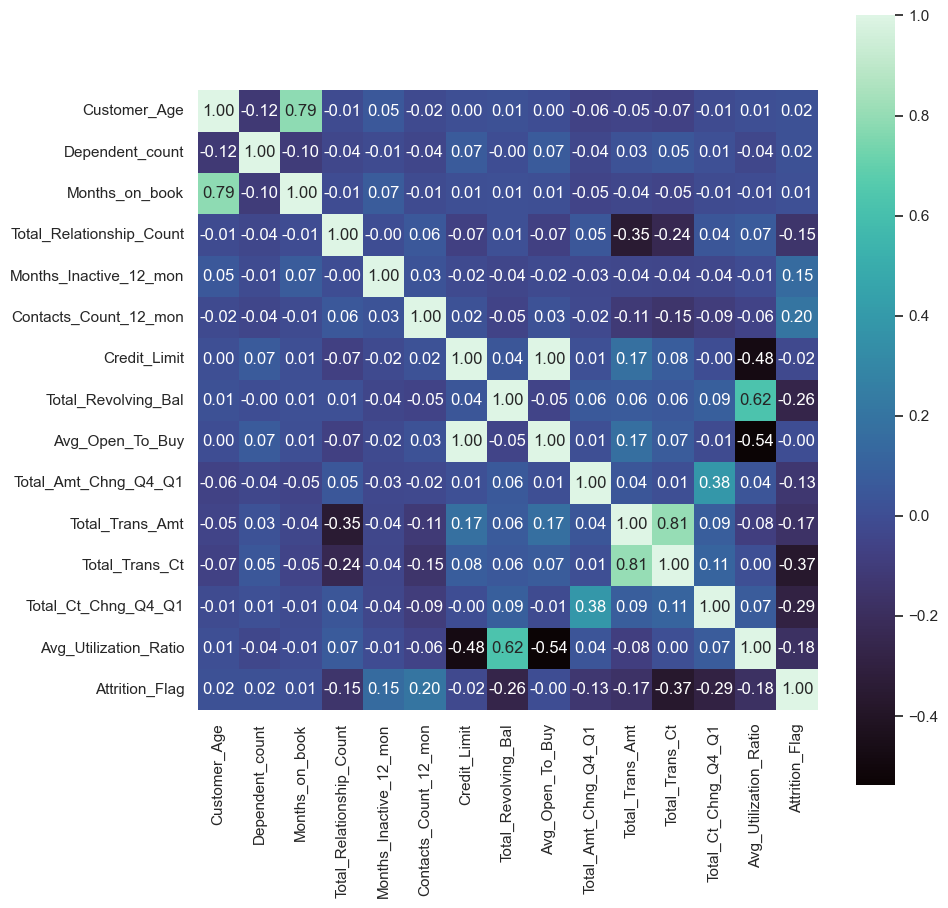

In [17]:
#check correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmin=None,
    cmap="mako",
    annot=True,
    fmt='.2f',
    cbar=True,
    square=True)

for i in cat_col:
    if i != "Attrition_Flag":
        cor_cat(i)

Based on those correlations, we can derive the following information for features that have little to no correlation with our label:
* Customer_Age
* Depndent_count
* Months_on_book
* Credit_Limit
* Avg_Open_To_Buy
* All Categorical Values

However, as previously stated, we will keep Credit_Limit as the difference between attrited and existing customers, as well as Income_Level value to differentiate between classes.

In [18]:
correlated_columns = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender', 'Education_Level', 'Marital_Status', 
                      'Income_Category', 'Attrition_Flag']

---

## 03. Feature Engineering

### Feature Selection

We can then proceed to choose the feature based on the correlation analysis.

In [19]:
bank_df = bank_df[correlated_columns]

bank_df.shape

(10127, 15)

### Resampling

Because the analysis shows that the number of existing customers outnumbers the number of attrited customers, we can resample the data using upsampling to increase the number of attrited customers.

In [20]:
# Separate majority and minority classes
bank_df_before = bank_df.copy()

majority_class = bank_df[bank_df['Attrition_Flag'] == 'Existing Customer']
minority_class = bank_df[bank_df['Attrition_Flag'] == 'Attrited Customer']

# Upsample the minority class
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=5)

# Combine the upsampled data with the original majority class
bank_df = pd.concat([majority_class, upsampled_minority])

### Split Target and Features

Then we can split our data into Label($y$) and feature ($X$) and split them each into train and test sets.

In [21]:
X = bank_df.drop(columns="Attrition_Flag")
y = bank_df["Attrition_Flag"]

X.shape, y.shape

((17000, 14), (17000,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=5)

X_train.shape, y_train.shape

((11900, 14), (11900,))

### Pipeline

After we have the train and test data, we will use a pipeline to preprocess the data, which will include handling outliers, encoding categorical data, and scaling numerical data.

First, we must specify which feature will go through those steps.

In [23]:
#define variable used in pipeline
outliers=['Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 
 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
num_col = bank_df.select_dtypes(include=np.number).columns.tolist()
onehot_col = ["Gender", "Marital_Status"]
ordinal_col = ["Education_Level", "Income_Category"]

For the ordinal column, we can specify the ranking of each unique value from each column.

In [24]:
#define ordinal ranking
education = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post_Graduate', 'Doctorate']
income = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']


#### Capping Outliers - Winsorizer

We already identified our outliers in the previous analysis; now we will cap the outliers using winsorizer, and our bound will be determined using **iqr** and **fold 1.5**.


In [25]:
#create the capper
winsorizer_pipeline = Pipeline(
    [
        (
            "winsorizer",
            Winsorizer(
                capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                tail='both', # cap left, right or both tails 
                fold=1.5,
                variables=outliers)
         )
        ]
    )

#### Encoding - Onehot and Ordinal

We will use ordinal encoder for ordinal categorical data and onehot encoder for nominal category with rankings for encoding.

In [26]:
#ordinal encoder
ordinal_pipeline = Pipeline(
    [
        (
            "ordinal_encoder",
            OrdinalEncoder(
                categories=[education,income],
                handle_unknown="use_encoded_value",
                unknown_value=-1,
            ),
        )  # encode using ordinal encoder
    ]
)

In [27]:
#onehot encoder
onehot_pipeline = Pipeline(
    [
        (
            "onehot_encoder",
            OneHotEncoder(handle_unknown="ignore"),
        )  # encode using onehot encoder
    ]
)

As for our label, we need to also encode it using label encoder
* 1 : Existing Customer
* 0 : Attrited Customer

In [28]:
#label encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y = label_encoder.transform(y)

y_train

array([1, 0, 0, ..., 1, 1, 1])

#### Scaling

We can then scale our data using a robust scaler, robust scaler is chosen to reduce the impact of our capped outliers.

In [29]:
#robust scaler
robust_pipeline = Pipeline(
    [
        (
            "robust_scaler",
            RobustScaler()
        )
    ]
)

#### Pipeline - Column Transformer

Then, we can combine our entire preprocessing pipeline into a column transformer for use in our pipeline model.

In [30]:
#make columntransformer
col_transformers = ColumnTransformer(
    [
        ("pipe_winsor", winsorizer_pipeline, outliers),
        ("pipe_scaler", robust_pipeline, num_col),
        ("pipe_ord", ordinal_pipeline, ordinal_col),
        ("pipe_onehot", onehot_pipeline, onehot_col)
    ]
)

## 04. Base Modeling

Then we can continue to feed our dataset into the following model to see which model produces the best results.

### Support Vector Machine Classifier

Support Vector Classifier (SVC) is a powerful and versatile classification algorithm. It works by finding the hyperplane that best separates different classes in the feature space
* **Pros**: Effective in high-dimensional spaces, works well with complex decision boundaries, and can handle non-linear relationships through kernel tricks.
* **Cons**: Can be computationally intensive for large datasets, sensitive to parameter tuning, and might struggle with noisy data.

In [31]:
#define model
svc = SVC()

svc_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("svc", svc)
])

In [32]:
#train model
svc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                                                                                               'Post_Graduate',
                                                                                               'Doctorate'],
                                                                                              ['Unknown',
                                                                                               'Less '
                                                                                               'than '
                                                                                               '$40K',
                                                                                               '$40K '
                                                                                               '- '
                                                                                               '$60K',
                                                                                               '$60K '
                                                                                               '- '
                                                                                               '$80K',
                                                                                               '$80K '
                                                                                               '- '
                                                                                               '$120K',
                                                                                               '$120K '
                                                                                               '+']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Education_Level',
                                                   'Income_Category']),
                                                 ('pipe_onehot',
                                                  Pipeline(steps=[('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Marital_Status'])])),
                ('svc', SVC())])

In [33]:
#train evaluation
svc_train_score = cross_val_score(svc_pipeline, X, y, cv=5, scoring="recall")

print("Cross-validation scores:", svc_train_score)
print("Mean CV score:", svc_train_score.mean())

Cross-validation scores: [0.03235294 0.45       0.96823529 0.99529412 0.30529412]
Mean CV score: 0.550235294117647


Our cross validation result for SVC is not particularly impressive; it has several high recall values but also a very low value, lowering its average to 0.55.

### Decision Tree Classifier

Decision Trees are intuitive and interpretable models that partition data into subsets based on feature values. It makes decisions by traversing a tree-like structure of if-else conditions.
* **Pros**: Easy to understand, capable of handling both categorical and numerical data, and can capture non-linear relationships.
* **Cons**: Prone to overfitting, especially for deep trees; small changes in data can lead to different trees; not as powerful as some other algorithms in capturing complex patterns.

In [34]:
#define Model
decision_tree = DecisionTreeClassifier()

dt_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("decision_tree", decision_tree)
])

In [35]:
#train model
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                                                                                              ['Unknown',
                                                                                               'Less '
                                                                                               'than '
                                                                                               '$40K',
                                                                                               '$40K '
                                                                                               '- '
                                                                                               '$60K',
                                                                                               '$60K '
                                                                                               '- '
                                                                                               '$80K',
                                                                                               '$80K '
                                                                                               '- '
                                                                                               '$120K',
                                                                                               '$120K '
                                                                                               '+']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Education_Level',
                                                   'Income_Category']),
                                                 ('pipe_onehot',
                                                  Pipeline(steps=[('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Marital_Status'])])),
                ('decision_tree', DecisionTreeClassifier())])

In [36]:
#train evaluation
dt_train_score = cross_val_score(dt_pipeline, X, y, cv=5, scoring="recall")

print("Cross-validation scores:", dt_train_score)
print("Mean CV score:", dt_train_score.mean())

Cross-validation scores: [0.77823529 0.88529412 0.98588235 0.98117647 0.30058824]
Mean CV score: 0.7862352941176471


We have a significantly higher cross validation result from SVC for decision tree, with a mean score of 0.78.

### Random Forest Classifier

Random Forest is an ensemble technique that builds multiple decision trees and combines their predictions to improve generalization and reduce overfitting.
* **Pros**: Reduces overfitting compared to single decision trees, handles a large number of features well, provides feature importance rankings, and works well for a variety of data types.
* **Cons**: Can be slower to train and make predictions compared to single decision trees, may not be as interpretable as a single tree.

In [37]:
#define Model
rf = RandomForestClassifier()

rf_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("random_forest", rf)
])

In [38]:
#train model
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                                                                                              ['Unknown',
                                                                                               'Less '
                                                                                               'than '
                                                                                               '$40K',
                                                                                               '$40K '
                                                                                               '- '
                                                                                               '$60K',
                                                                                               '$60K '
                                                                                               '- '
                                                                                               '$80K',
                                                                                               '$80K '
                                                                                               '- '
                                                                                               '$120K',
                                                                                               '$120K '
                                                                                               '+']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Education_Level',
                                                   'Income_Category']),
                                                 ('pipe_onehot',
                                                  Pipeline(steps=[('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Marital_Status'])])),
                ('random_forest', RandomForestClassifier())])

In [39]:
#train evaluation
rf_train_score = cross_val_score(rf_pipeline, X, y, cv=5, scoring="recall")

print("Cross-validation scores:", rf_train_score)
print("Mean CV score:", rf_train_score.mean())

Cross-validation scores: [0.80117647 0.92352941 0.99352941 0.99647059 0.3       ]
Mean CV score: 0.8029411764705883


This model also outperforms the decision tree model with a mean score of 0.80, which is understandable given that random forest employs ensemble learning based on decision trees.

### XGBoost Classifier

In [40]:
#define Model
xgb = XGBClassifier()

xgb_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("xgboost", xgb)
])

In [41]:
#train model
xgb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [42]:
#train evaluation
xgb_train_score = cross_val_score(xgb_pipeline, X, y, cv=5, scoring="recall")

print("Cross-validation scores:", xgb_train_score)
print("Mean CV score:", xgb_train_score.mean())

Cross-validation scores: [0.85588235 0.92       0.99352941 0.99647059 0.27235294]
Mean CV score: 0.8076470588235294


XGBoost performs similarly to random forest, with a mean score of around 0.8. We will choose which model to use based on its test evaluation.


### Model Test Evaluation

We can then predict our test-set and see how our model predicts new data, allowing us to determine whether our data is overfitting or already sufficiently fit.

In [43]:
#predict
svc_test_pred = svc_pipeline.predict(X_test)
dt_test_pred = dt_pipeline.predict(X_test)
rf_test_pred = rf_pipeline.predict(X_test)
xgb_test_pred = xgb_pipeline.predict(X_test)

In [44]:
#classification report
svc_report = classification_report(y_true=y_test, y_pred=svc_test_pred)
dt_report = classification_report(y_true=y_test, y_pred=dt_test_pred)
rf_report = classification_report(y_true=y_test, y_pred=rf_test_pred)
xgb_report = classification_report(y_true=y_test, y_pred=xgb_test_pred)

report = {'SVC': svc_report, 
          'DT' : dt_report, 
          'RF' : rf_report, 
          'XGB' : xgb_report}

In [45]:
for i in report:
    print('='*25 + ' '+ i + ' ' + '='*25)
    print(report[i])
    print("\n")

========================= SVC =========================
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      2551
           1       0.76      0.68      0.72      2549

    accuracy                           0.73      5100
   macro avg       0.73      0.73      0.73      5100
weighted avg       0.73      0.73      0.73      5100



========================= DT =========================
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2551
           1       0.99      0.96      0.98      2549

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



========================= RF =========================
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2551
           1       1.00      0.97      0.98      2549

    accuracy

According to the report, XGBoost outperforms random forest with a slight increase in recall (score 1.0 for negative data and 0.98 for positive data), and the model's accuracy (score 0.99). As a result, we will use this model as our final model and perform hyperparameter tuning to achieve higher scores.

## 05. Model Improvement

### Hyperparameter Tuning

The parameter used is as follows:
* **max_depth** : A higher max_depth can potentially capture more intricate relationships in the data but also increases the risk of overfitting. It's important to find a balance between complexity and generalization
* **learning_rate** :  smaller learning rate can help the model converge more slowly and lead to better generalization. However, using a very small learning rate might require more trees (higher n_estimators) to achieve good performance
* **n_estimators** : Increasing the number of estimators can improve the model's performance up to a certain point. However, adding too many trees might lead to overfitting or increased computational cost
* **subsample** : Using a subsample less than 1.0 introduces randomness and can improve the model's generalization. It's often used in combination with other techniques to reduce overfitting

In [46]:
params = {
    'xgboost__max_depth': [3, 4, 5, 6],
    'xgboost__learning_rate': [0.1, 0.01, 0.001],
    'xgboost__n_estimators': [100, 500, 1000],
    'xgboost__subsample': [0.8, 0.9, 1.0],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=params, cv=5, scoring='recall', verbose=1)

In [47]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('pipe_winsor',
                                                                         Pipeline(steps=[('winsorizer',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     tail='both',
                                                                                                     variables=['Credit_Limit',
                                                                                                                'Total_Amt_Chng_Q4_Q1',
                                                                                                                'Total_Trans_Amt',
                                                                                                                'Total_Trans_Ct',
                                                                                                                'Total_Ct_Chng_Q4_Q1']))]),
                                                                         ['Credit_Limit',
                                                                          'Total_Amt_Chng_Q4_Q1',
                                                                          'Tot...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgboost__learning_rate': [0.1, 0.01, 0.001],
                         'xgboost__max_depth': [3, 4, 5, 6],
                         'xgboost__n_estimators': [100, 500, 1000],
                         'xgboost__subsample': [0.8, 0.9, 1.0]},
             scoring='recall', verbose=1)

In [48]:
print(grid_search.best_params_)

{'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 1000, 'xgboost__subsample': 0.9}


We obtained the following best parameter for our model after fitting our hyperparameter tuned model:
* **learning_rate** : 0.1
* **max_depth** : 3
* **n_estimators** : 100
* **subsample** : 0.9

### Model Evaluation

In [49]:
xgb_improved_pred = grid_search.predict(X_test)

In [50]:
xgb_improved_report = classification_report(y_true=y_test, y_pred=xgb_improved_pred)

print(xgb_improved_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2551
           1       1.00      0.98      0.99      2549

    accuracy                           0.99      5100
   macro avg       0.99      0.99      0.99      5100
weighted avg       0.99      0.99      0.99      5100



We can see that the model did not perform any better after we tuned the parameter, but the model performance is already excellent.

[Text(0, 0.5, 'Existed'), Text(0, 1.5, 'Attrited')]

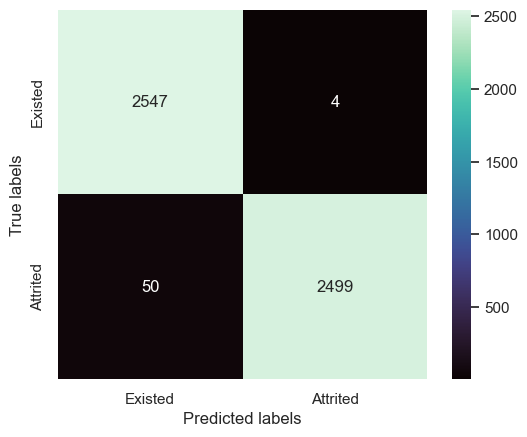

In [51]:
cm_df = confusion_matrix(y_true=y_test, y_pred=xgb_improved_pred)
ax= plt.subplot()
sns.heatmap(cm_df, vmin=None,
    cmap="mako",
    annot=True,
    fmt='.0f',
    cbar=True,
    square=True)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Existed', 'Attrited'])
ax.yaxis.set_ticklabels(['Existed', 'Attrited'])

In this instance, our Existed Customer is negative prediction, which means they will not churn. And our Attrited Customer is positive prediction

Based on confusion matrix above, we can gain several insight from our model:
* **True Positives (TP):** 2499
  * The model **correctly identified 2499** instances that truly belong to the **Attrited** class.
* **False Positives (FP)**: 50
  * The model made **50 incorrect predictions** for instances that were actually **Existed**.
* **True Negatives (TN)**: 2547
  * The model **accurately identified 2547** instances that truly belong to the **Existed** class.
* **False Negatives (FN)**: 4
  * The model **missed 4 instances** that truly belonged to the **Attrited** class.

This means that the model is already very good at classifying customers attritied with only a 1% prediction error in each class.

In [52]:
#save file
with open('./deployment/model/xgb_tuned.pkl', 'wb') as file:
  pickle.dump(grid_search, file)

## 06. Churn Clustering

We can now cluster our churned customers for the next step.

In [36]:
X_cluster = bank_df[bank_df['Attrition_Flag']=='Attrited Customer']
X_cluster.drop(columns=['Attrition_Flag'], inplace=True)
X_cluster = col_transformers.fit_transform(X_cluster)
Scaler = RobustScaler()
X_cluster = Scaler.fit_transform(X_cluster)
X_cluster = pd.DataFrame(X_cluster)
X_cluster

0         1         2         3         4         5    6    7   \
0    -0.093654  0.147420  0.196145 -0.285714 -0.643836  1.000000  0.0 -0.5   
1    -0.352281 -0.176904 -0.814059 -0.285714 -0.304795  0.000000  2.0  1.0   
2     2.233435 -0.782965 -0.191610  0.214286 -0.325342 -0.333333  0.0  0.0   
3    -0.311290 -1.991400 -0.869615 -0.571429 -1.726027 -0.333333  1.0 -1.0   
4    -0.011978  0.812449  2.024943  2.071429 -0.178082  1.000000 -1.0 -0.5   
...        ...       ...       ...       ...       ...       ...  ...  ...   
8495  2.233435 -0.042588  0.120181  0.571429  0.383562  0.000000  0.0  0.0   
8496  0.033894  0.999181  2.024943  1.714286  0.787671  1.000000 -1.0 -0.5   
8497  0.093272  1.012285  2.024943  2.071429 -0.113014 -0.333333  0.0 -1.0   
8498 -0.227574 -1.022113 -0.536281 -0.357143 -0.431507  0.000000 -1.0 -0.5   
8499  0.642839 -0.288288  0.004535  0.142857  0.065068  1.000000  0.0  0.0   

            8         9   ...        13        14        15   16   17   18  \
0    -0.093654  1.946636  ... -0.643836  3.270270 -0.333333 -0.5  0.0  0.0   
1    -0.352281  0.000000  ... -0.304795  0.000000  0.666667 -0.5  0.0  0.0   
2     2.464195  1.010828  ... -0.325342  0.252252  0.666667  1.0 -1.0  1.0   
3    -0.311290  0.000000  ... -1.726027  0.000000 -1.000000 -0.5  0.0  0.0   
4    -0.011978  0.000000  ... -0.178082  0.000000  0.333333  0.5 -1.0  1.0   
...        ...       ...  ...       ...       ...       ...  ...  ...  ...   
8495  3.862513  0.000000  ...  0.383562  0.000000  0.666667  1.0 -1.0  1.0   
8496  0.033894  1.802784  ...  0.787671  2.351351 -1.000000  0.5 -1.0  1.0   
8497  0.093272  1.217324  ... -0.113014  1.436937  0.666667 -0.5  0.0  0.0   
8498 -0.227574  0.000000  ... -0.431507  0.000000  0.666667 -0.5  0.0  0.0   
8499  0.642839  0.000000  ...  0.065068  0.000000 -0.666667 -1.0  0.0  0.0   

       19   20   21   22  
0     0.0  0.0  0.0  1.0  
1     0.0  0.0  1.0  0.0  
2     0.0  1.0  0.0  0.0  
3     0.0  1.0  0.0  0.0  
4     0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  
8495  0.0  0.0  1.0  0.0  
8496  0.0  1.0  0.0  0.0  
8497  0.0  1.0  0.0  0.0  
8498  0.0  1.0  0.0  0.0  
8499  0.0  0.0  1.0  0.0  

[8500 rows x 23 columns]

### PCA

We can reduce the dimensionality of our dataset before clustering, this will help us plot the cluster later.


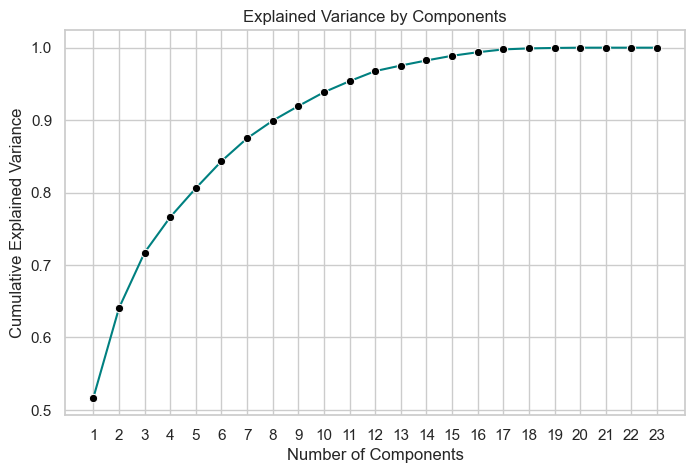

In [38]:
pca_test = PCA()
pca_test.fit(X_cluster)


plt.figure(figsize=(8, 5))
num_components = len(pca_test.explained_variance_ratio_)
sns.lineplot(x=range(1, num_components + 1), y=pca_test.explained_variance_ratio_.cumsum(), 
             marker='o', color='teal', markerfacecolor='black')
plt.title('Explained Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.xticks(range(1, num_components + 1))
plt.grid(True)
plt.show()

In [45]:
# pca_final
pca_model = Pipeline(
    [
        ("column_transformer", col_transformers),
        ("robust_scaler", Scaler),
        ("PCA", PCA(n_components=2))
    ]
)


In [40]:
pca_model

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                                                                                               'than '
                                                                                               '$40K',
                                                                                               '$40K '
                                                                                               '- '
                                                                                               '$60K',
                                                                                               '$60K '
                                                                                               '- '
                                                                                               '$80K',
                                                                                               '$80K '
                                                                                               '- '
                                                                                               '$120K',
                                                                                               '$120K '
                                                                                               '+']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Education_Level',
                                                   'Income_Category']),
                                                 ('pipe_onehot',
                                                  Pipeline(steps=[('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Marital_Status'])])),
                ('robust_scaler', RobustScaler()),
                ('PCA', PCA(n_components=2))])

In [44]:
bank_df_churned = bank_df[bank_df['Attrition_Flag']=='Attrited Customer']
bank_df_churned.drop(columns=['Attrition_Flag'], inplace=True)

bank_df_pca = pca_model.fit_transform(bank_df_churned)

bank_df_pca.shape

(8500, 2)

We can see that our dimensionality has decreased from 14 to 2.

### Elbow Point and Sillhouete Score

We could check it using elbow point and sillhouete score before choosing the number of our cluster; we will choose the number from the elbow point before the graph begins to stagnate and the highest point in sillhouete score.

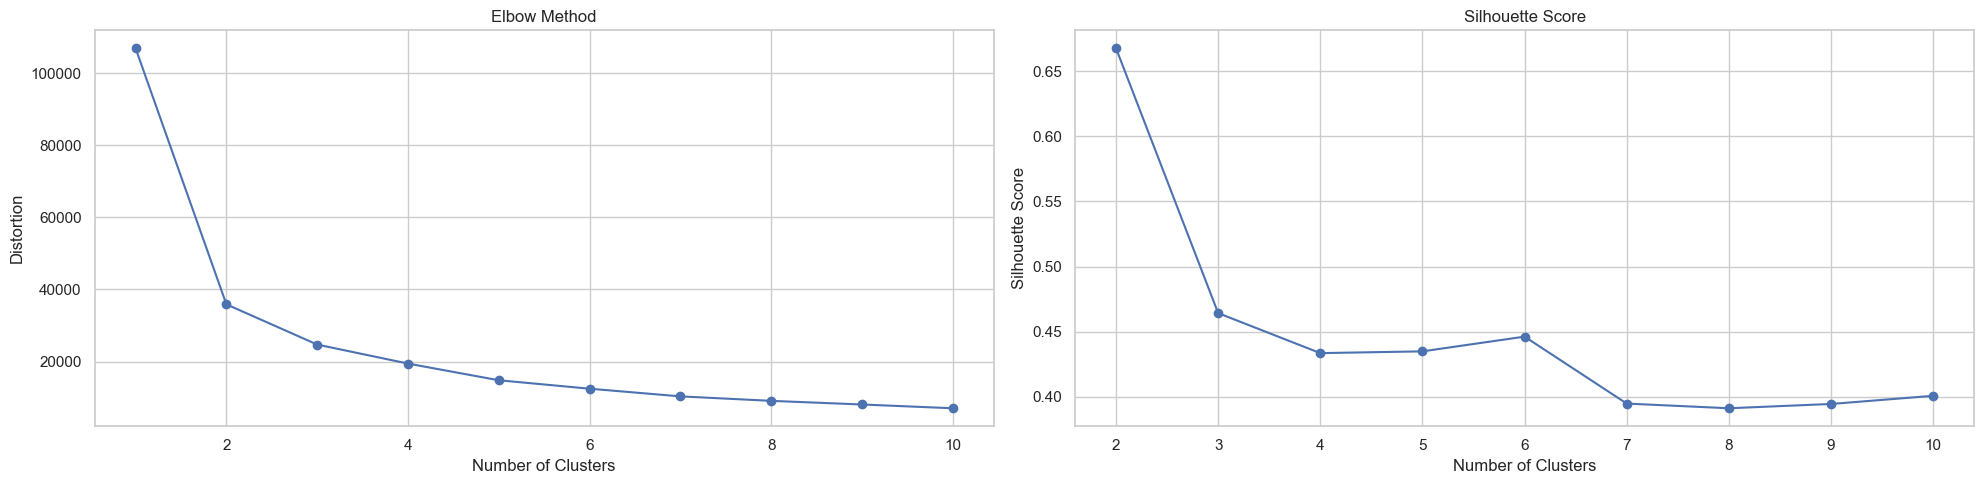

In [46]:
# Calculate distortions (inertia) for different numbers of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(bank_df_pca)
    distortions.append(kmeans.inertia_)

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(bank_df_pca)
    labels = kmeans.labels_
    score = silhouette_score(bank_df_pca, labels)
    silhouette_scores.append(score)

# Plot elbow point (distortions)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


We got 2 elbow points from the elbow method, and the highest sillhouete score is at 2 clusters. As a result, we will use two clusters in our kmeans clustering.

### Define Kmeans Final Model

We can then define our final kmeans model and fit it to our dataset.

In [47]:
#define kmeans model
kmeans_model = Pipeline(
    [
        (
            "Kmeans",
            KMeans(n_clusters=2, n_init='auto', random_state=5)
        )
    ]
)

#define pipeline
kmeans_pipeline = Pipeline([
    ("pca", pca_model),
    ("kmeans", kmeans_model)
])

In [48]:
kmeans_pipeline.fit(bank_df_churned)

Pipeline(steps=[('pca',
                 Pipeline(steps=[('column_transformer',
                                  ColumnTransformer(transformers=[('pipe_winsor',
                                                                   Pipeline(steps=[('winsorizer',
                                                                                    Winsorizer(capping_method='iqr',
                                                                                               fold=1.5,
                                                                                               tail='both',
                                                                                               variables=['Credit_Limit',
                                                                                                          'Total_Amt_Chng_Q4_Q1',
                                                                                                          'Total_Trans_Amt',
                                                                                                          'Total_Trans_Ct',
                                                                                                          'Total_Ct_Chng_Q4_Q1']))]),
                                                                   ['Credit_Limit',
                                                                    'Total_Amt_Chng_Q4_Q1',
                                                                    'Total_Tr...
                                                                                                   handle_unknown='use_encoded_value',
                                                                                                   unknown_value=-1))]),
                                                                   ['Education_Level',
                                                                    'Income_Category']),
                                                                  ('pipe_onehot',
                                                                   Pipeline(steps=[('onehot_encoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Gender',
                                                                    'Marital_Status'])])),
                                 ('robust_scaler', RobustScaler()),
                                 ('PCA', PCA(n_components=2))])),
                ('kmeans',
                 Pipeline(steps=[('Kmeans',
                                  KMeans(n_clusters=2, n_init='auto',
                                         random_state=5))]))])

### Cluster Result Analysis

After fitting, we can save the result to a new dataframe that contains our initial dataset and clustered labels. We will use this dataframe to analyze our clustering results.

In [51]:
label = kmeans_pipeline.named_steps['kmeans'].named_steps['Kmeans'].labels_

clusters= pd.DataFrame(bank_df_churned)
clusters["cluster"] = label
clusters.head()

Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6397                         6                       3                      2   
2619                         3                       5                      5   
7028                         2                       3                      3   
7761                         2                       4                      1   
9327                         6                       2                      2   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
6397        3468.0                 2517                 0.746   
2619        1438.3                    0                 0.647   
7028       23542.0                 1307                 0.462   
7761        1760.0                    0                 0.046   
9327        4109.0                    0                 0.949   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
6397             2494              39                0.345   
2619             1603              39                0.444   
7028             2152              46                0.438   
7761             1554              35                0.029   
9327             8642              77                0.481   

      Avg_Utilization_Ratio Gender Education_Level Marital_Status  \
6397                  0.726      F      Uneducated        Unknown   
2619                  0.000      F        Graduate         Single   
7028                  0.056      M        Graduate        Married   
7761                  0.000      F   Post-Graduate        Married   
9327                  0.000      M         College         Single   

     Income_Category  cluster  
6397  Less than $40K        1  
2619  Less than $40K        1  
7028    $80K - $120K        1  
7761  Less than $40K        1  
9327     $60K - $80K        0

In [52]:
clusters["cluster"].value_counts()

cluster
1    6895
0    1605
Name: count, dtype: int64

We can see that there are two clusters, with cluster 1 having a higher count than cluster 0. We will then examine the characteristics of each of these clusters to gain a better understanding of what these clusters represent.

For the first analysis, we will use pairplot to determine the distribution of our cluster and its relationship to other features.

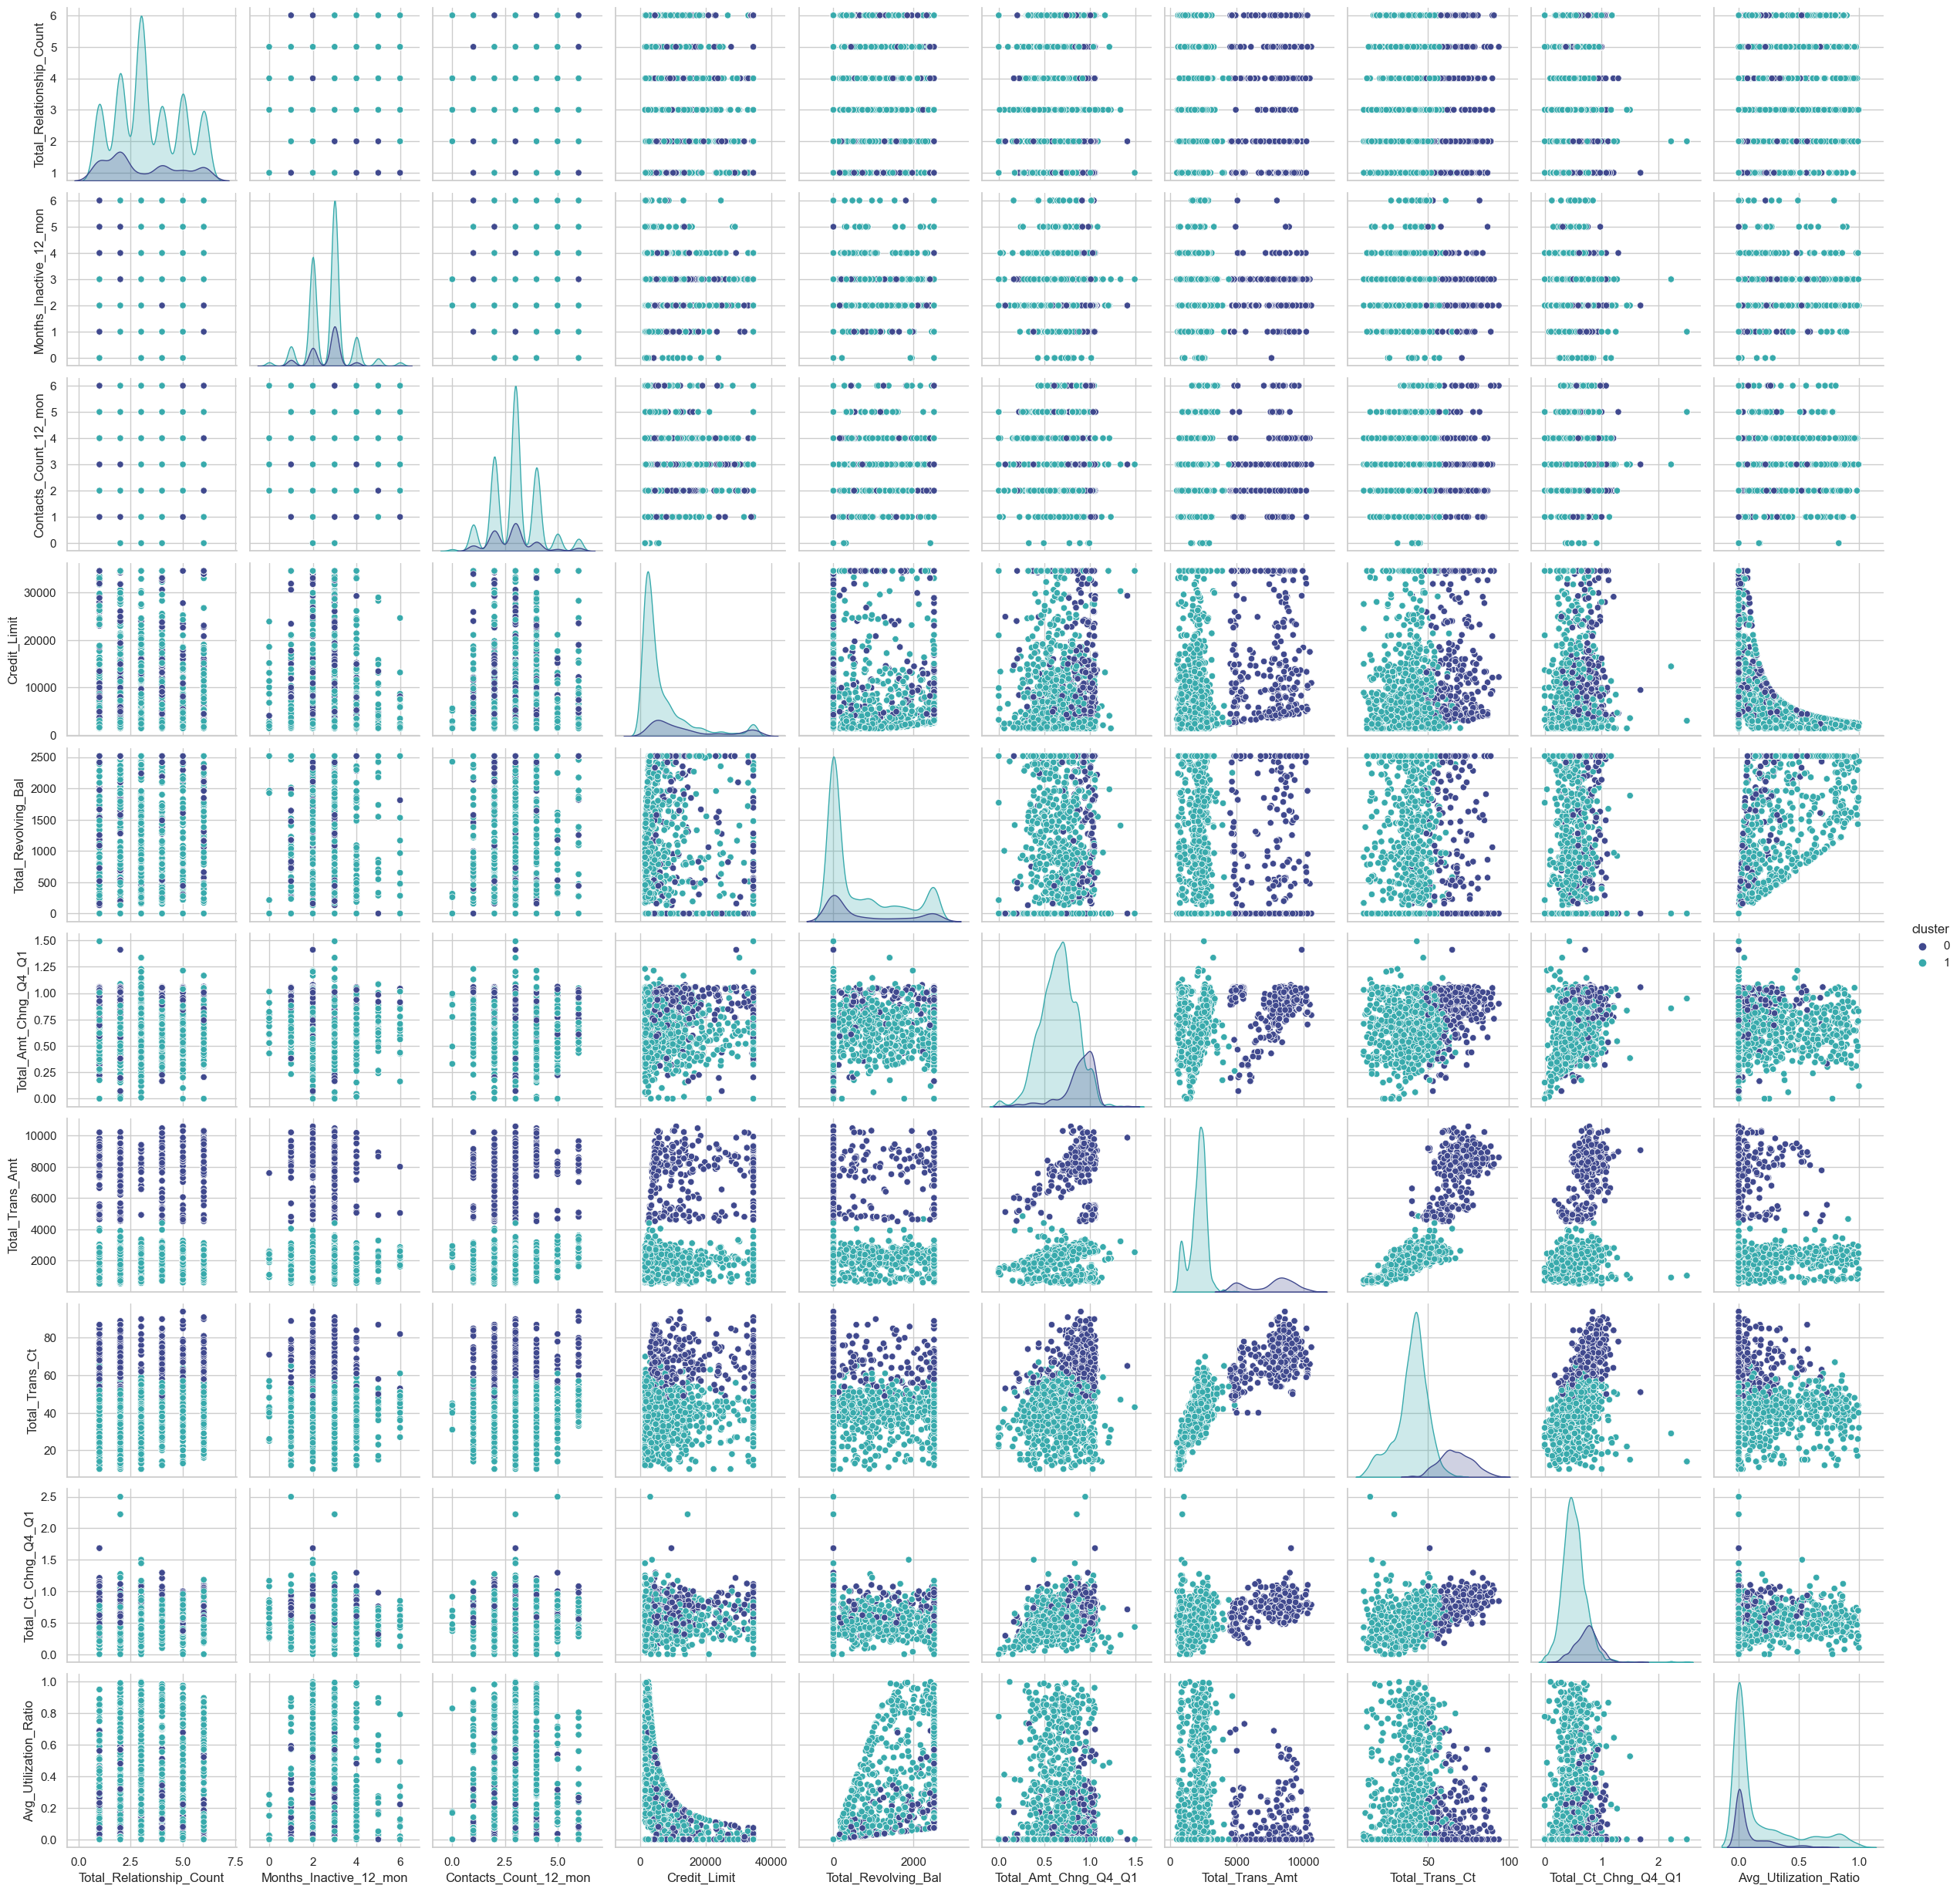

In [ ]:
sns.pairplot(clusters, hue="cluster", palette="mako")

We can see that there is two feature that has significant cluster differentiation, which is total transaction amount and total transaction count, there are also several features that have slight differentiation, such as total revolving balance and credit limit, and the other feature is unclear on what it represents in the cluster.


For the categorical data we can use facet grid to examine the difference between two clusters

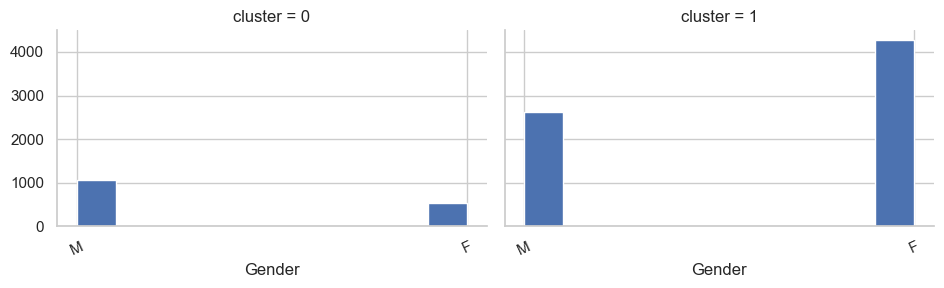

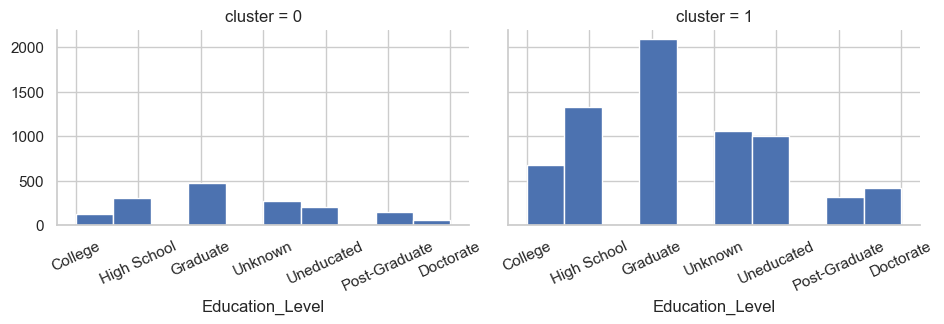

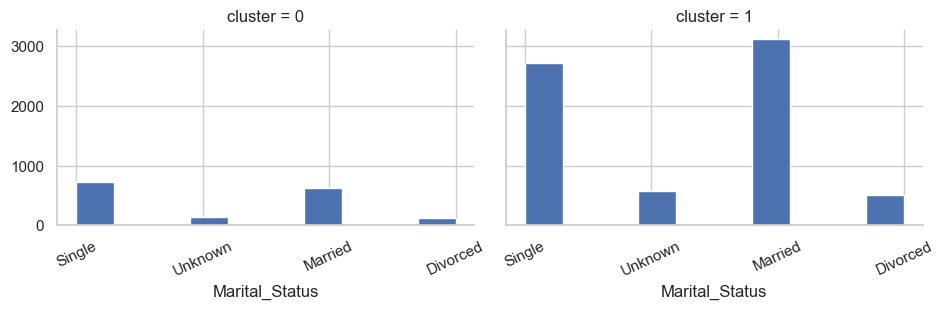

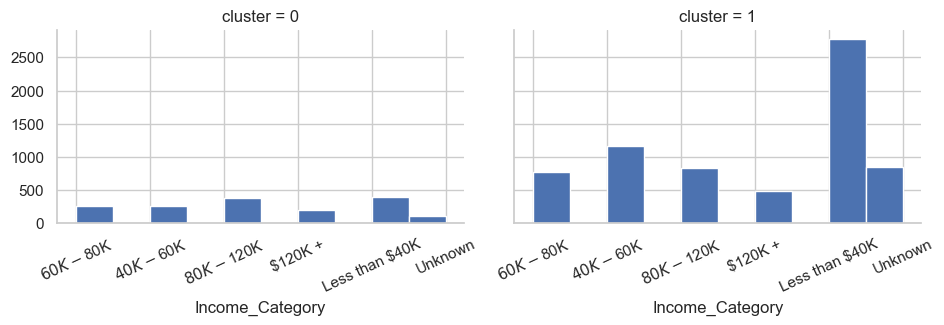

In [ ]:
for c in clusters [['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',]]:
    grid= sns.FacetGrid(clusters, col='cluster', aspect=1.6, palette="mako")
    grid.map(plt.hist, c)
    grid.set_xticklabels(rotation=25)

As we can see, the category features does not have significance distribution difference for each clusters. Therefore, we will onyl use .

We will investigate credit limit, incomecategory, revolving balance, and average utilization ratio further in the plot below

In [ ]:
clusters.columns

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender',
       'Education_Level', 'Marital_Status', 'Income_Category', 'cluster'],
      dtype='object')

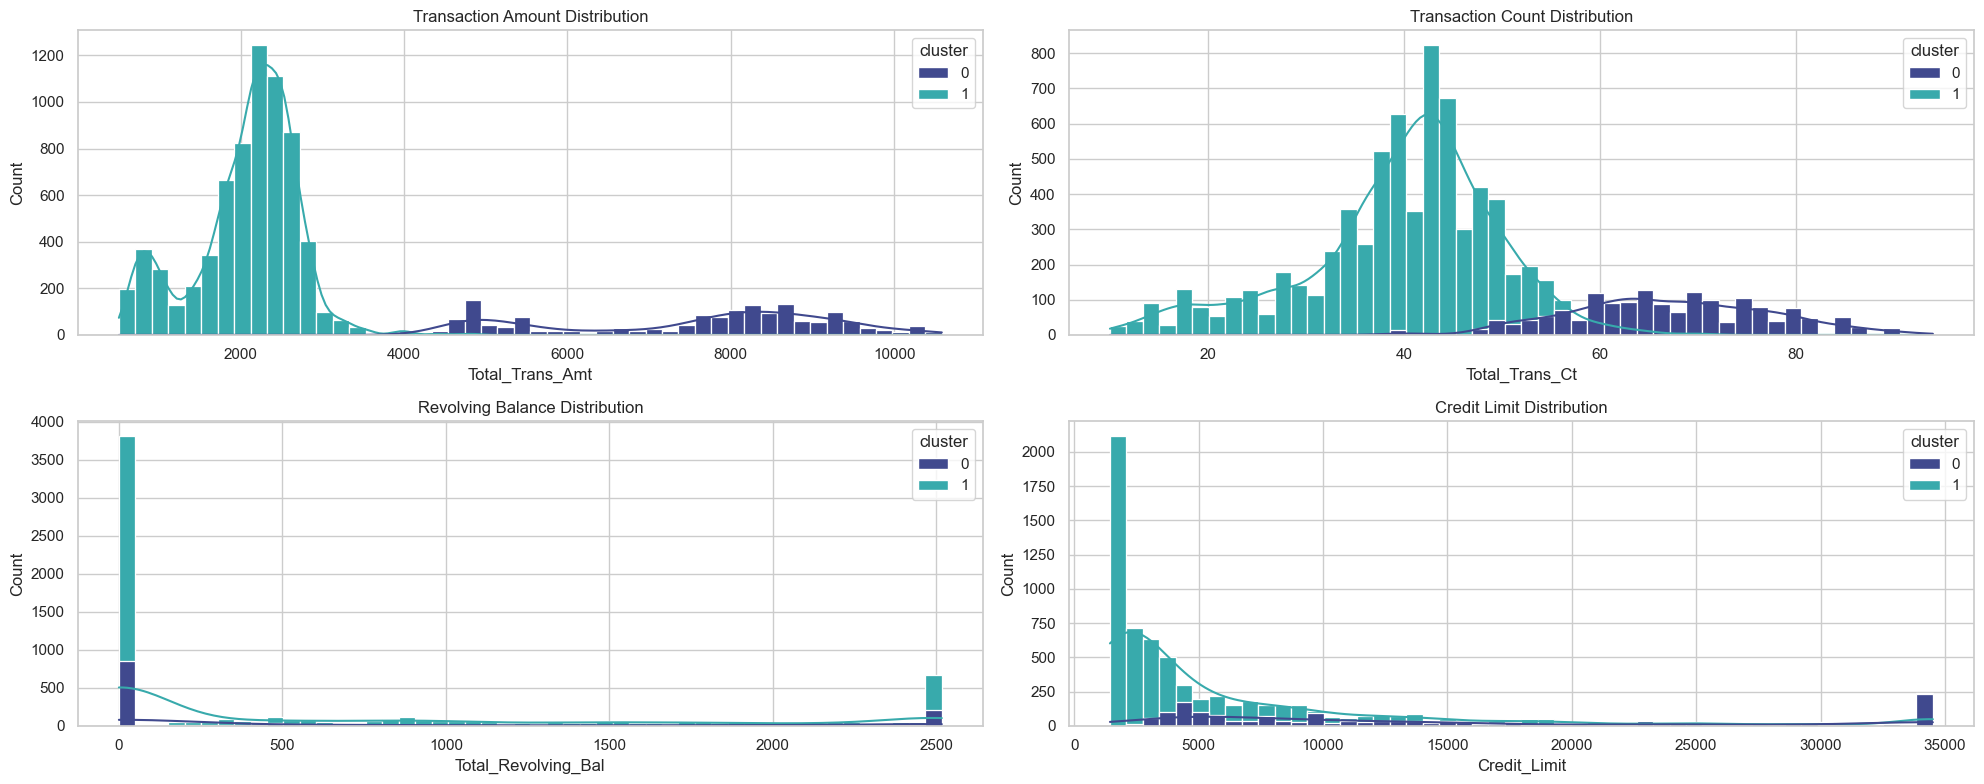

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))

#plot for Credit_Limit
sns.histplot(data=clusters, x="Total_Trans_Amt", hue="cluster", kde=True, bins=50, palette="mako", alpha=1, ax=axes[0, 0])
axes[0, 0].set_title("Transaction Amount Distribution")

#plot for Credit_Limit
sns.histplot(data=clusters, x="Total_Trans_Ct", hue="cluster", kde=True, bins=50, palette="mako", alpha=1, ax=axes[0, 1])
axes[0, 1].set_title("Transaction Count Distribution")

#plot for Total_Revolving_Bal
sns.histplot(data=clusters, x="Total_Revolving_Bal", hue="cluster", kde=True, bins=50, palette="mako", alpha=1, ax=axes[1, 0])
axes[1, 0].set_title("Revolving Balance Distribution")

#plot for Avg_Utilization_ratio
sns.histplot(data=clusters, x="Credit_Limit", hue="cluster", kde=True, bins=50, palette="mako", alpha=1, ax=axes[1, 1])
axes[1, 1].set_title("Credit Limit Distribution")

fig.tight_layout()

We can learn several things from those plots:
* Total Transaction Amount is divided into two clusters completely: cluster 0 for high amount spent (over $4,000) and cluster 1 for low amount spent (under $4,000).

* For Total Transaction Count, the cluster have a little bit of overlapping: cluster 0 for high frequency usage, and cluter 1 for low frequency usage

* As for the revolving balance and credit limit, this feature has no effect on clusterization.

* However, all of the other three features here, with the exception of credit_limit, have numerous overlapping data, so we cannot use these three column


So, the final cluster of churned customer is as follow:
* **Cluster 1** : High Spent Amount (>4K), High Usage Frequency
* **Cluster 2** : Low Spent Amount (<4K), Low Usage Frequency

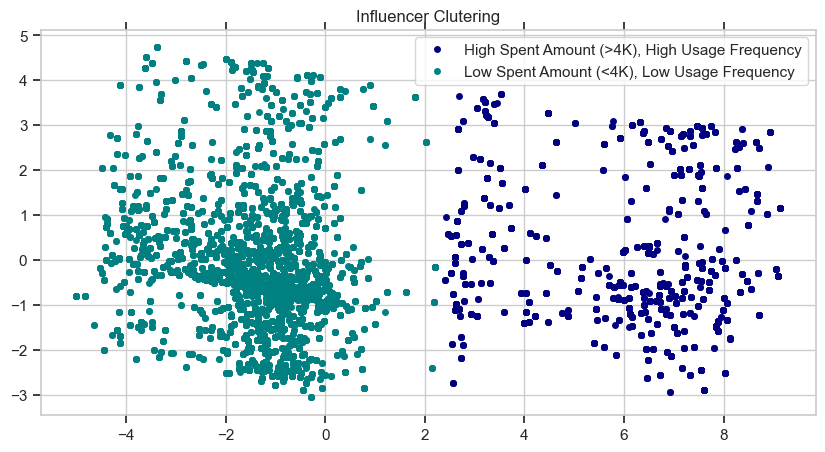

In [53]:
#visualize into 2d plot
#visualize

x, y = bank_df_pca[:, 0], bank_df_pca[:, 1]

colors = {0: 'navy',
          1: 'teal'}

names = {0: 'High Spent Amount (>4K), High Usage Frequency', 
         1: 'Low Spent Amount (<4K), Low Usage Frequency',}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':label}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(10, 5)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Influencer Clutering")
plt.show()

The scatter plot from our clustered data shows that our cluster has only a little overlapping.

In [58]:
with open('./deployment/model/model_kmeans.pkl', 'wb') as file_4:
  pickle.dump(kmeans_pipeline, file_4)

## 07. Data Inference

In [57]:
with open('./deployment/model/xgb_tuned.pkl', 'rb') as file_1:
  prediction_model = pickle.load(file_1)

with open('./deployment/model/model_kmeans.pkl', 'rb') as file_2:
  cluster_model = pickle.load(file_2)

In [59]:
data_inf = {
    'Total_Relationship_Count': [4],
    'Months_Inactive_12_mon': [2],
    'Contacts_Count_12_mon': [2],
    'Credit_Limit': [10834.0],
    'Total_Revolving_Bal': [0],
    'Total_Amt_Chng_Q4_Q1': [0.522],
    'Total_Trans_Amt': [2249],
    'Total_Trans_Ct': [51],
    'Total_Ct_Chng_Q4_Q1': [0.594],
    'Avg_Utilization_Ratio': [0.0],
    'Gender': ['M'],
    'Education_Level': ['Graduate'],
    'Marital_Status': ['Single'],
    'Income_Category': ['$80K - $120K'],
    'Card_Category': ['Blue'],
}

data_inf= pd.DataFrame(data_inf)
data_inf

Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         4                       2                      2   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0       10834.0                    0                 0.522             2249   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Gender  \
0              51                0.594                    0.0      M   

  Education_Level Marital_Status Income_Category Card_Category  
0        Graduate         Single    $80K - $120K          Blue

In [67]:
pred_inf = prediction_model.predict(data_inf)
if pred_inf == 0:
    pred_inf = "Attrited Customer"
else:
    pred_inf = "Existing Customer"


In [69]:
if pred_inf == "Attrited Customer":
    cluster_inf = cluster_model.predict(data_inf)
else:
    cluster_inf = None

if cluster_inf == 0:
    cluster_inf = "Cluster 1 : High Spent Amount, High Usage Frequency"
elif cluster_inf == 1:
    cluster_inf = "Cluster 2 : Low Spent Amount, Low Usage Frequency"
    
print(pred_inf)
print(cluster_inf)

Attrited Customer
Cluster 2 : Low Spent Amount, Low Usage Frequency


## 08. Conclusion

### Modeling

From the 4 model we have tested, the best model we get is XGBoost with following parameter:
* **learning_rate** : 0.1
* **max_depth** : 3
* **n_estimators** : 100
* **subsample** : 0.9

The performance of the model is as follow:

In [ ]:
print(xgb_improved_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2551
           1       1.00      0.98      0.99      2549

    accuracy                           0.99      5100
   macro avg       0.99      0.99      0.99      5100
weighted avg       0.99      0.99      0.99      5100



**Precision**
* For class 0, the precision is 0.98, and for class 1, it's 1.00. 
* Precision indicates how many of the instances predicted as a certain class are actually that class. In this case, for class 0, out of all instances predicted as class 0, **98% are truly class 0**. For class 1, **100% of predicted class 1 instances are truly class 1**.

**Recall** 
* For class 0, the recall is 1.00, and for class 1, it's 0.98. 
* Recall indicates how many of the actual instances of a certain class were correctly predicted as that class. In this case, for class 0, **100% of actual class 0 instances were correctly predicted**, and for class 1, **98% of actual class 1 instances were correctly predicted**.

**Accuracy** 
* The overall accuracy of the model is 0.99, which means that the model's predictions were correct for approximately 99% of the instances.

In summary, this classification report indicates that the model has achieved high precision, recall, and F1-score for both classes, suggesting strong performance in correctly classifying instances from both classes. The overall accuracy of 99% further supports the model's effectiveness.

However, even our classification model performance is already excellent, it still can be improved a little bit for the clustering. there are several things worth to note for our clustering model.
* The model still had difficulties in cluster on the data given, it might need more data
* The characteristic of each cluster are not clearly defined and have many overlapping characteristics
* We need to improve the feature selection for our clustering to make sure we get a good result on sillhouete score

### Business

Here are some recommendations to help reduce churn among customers in both low and high credit limit clusters:

#### For Cluster 1 - Customers with High Credit Limit:

* **Rewards and Recognition**: Offer loyalty rewards, discounts, or exclusive perks to incentivize them to continue using your services. Recognize their high-value status and show appreciation.
* **Tailored Financial Solutions**: Provide personalized financial solutions like investment advice, premium account services, or tailored credit options that align with their financial goals.
* **Financial Education**: Offer educational resources to help them make informed financial decisions. Webinars, articles, and workshops can empower them to manage their wealth more effectively.

#### For Cluster 2 - Customers with Low Credit Limit:

* **Improved Credit Opportunities**: Provide opportunities for customers to increase their credit limit based on responsible financial behavior over time. This can help them meet their financial needs without the frustration of a low limit.

* **Value Proposition**: Communicate the value of your services to this cluster. Offer them benefits that resonate with their needs, such as simplified account management, digital tools, and cost-saving features.
* **Fee Structure Review**: Review and optimize fee structures for this cluster. Consider offering fee waivers or lower minimum balance requirements to make your services more accessible.
* **Financial Planning Assistance**: Provide financial planning resources to help them make the most of their resources. Empower them to grow their financial health and eventually move into higher-spending categories.

As for general churned customer, here are some advised recommendation:
* **Exit Surveys**: Conduct exit surveys to understand why customers left. Use their feedback to address pain points and improve services to prevent future churn.
* **Win-Back Campaigns**: Identify and reach out to churned customers with targeted win-back campaigns. Offer them incentives to return, such as fee waivers, exclusive offers, or improved account terms.

We need to take a note that a comprehensive approach is essential. Each recommendation should be aligned with Danamon Bank business's goals, values, and customer segments. Continuously analyze the effectiveness of your strategies and adapt as necessary to keep your customers engaged and satisfied.